**Aryan Zende**<h1 style='text-align:center;'>CODSOFT</h1> <h3 style='text-align:center;'>DATA SCIENCE</h3> <h4 style='text-align:center;'>Titanic Survival Prediction using Machine Learning</h4> <p style='text-align:center;'>Analyze historical Titanic passenger data to predict survival based on features like age, gender, class, and fare.</p>

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Titanic-Dataset.csv")

In [3]:
df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
x=df.loc[::,["Pclass","Sex","Age"]]
y=df.Survived

In [6]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [7]:
x.Age.fillna(x.Age.mean(),inplace=True)

In [8]:
x

,Pclass,Sex,Age
0,3,male,22.000000
1,1,female,38.000000
2,3,female,26.000000
3,1,female,35.000000
4,3,male,35.000000
...,...,...,...
886,2,male,27.000000
887,1,female,19.000000
888,3,female,29.699118
889,1,male,26.000000


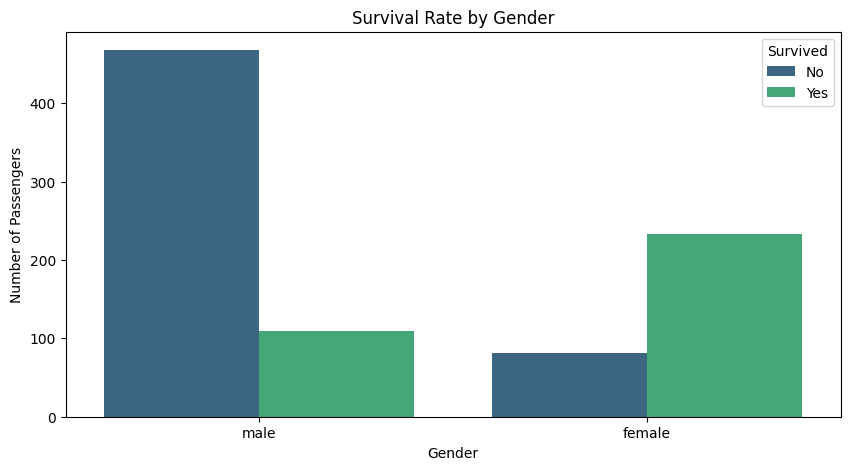

In [9]:
# Visualization 1: Survival Rate by Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

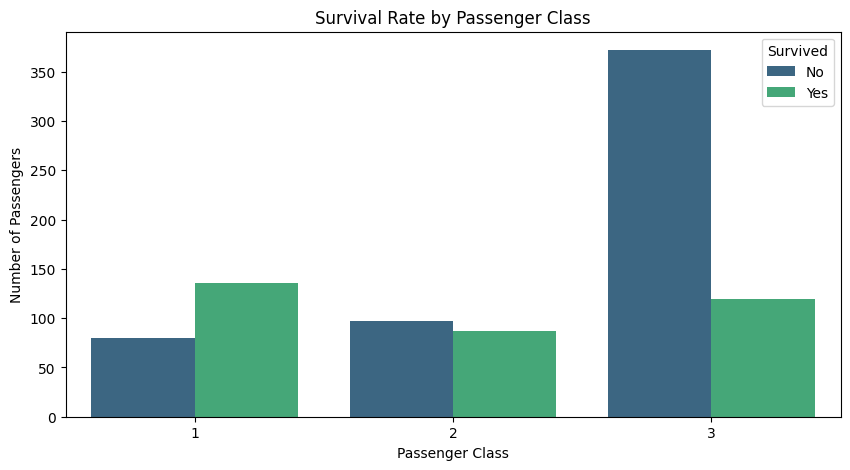

In [10]:
# Visualization 2: Survival Rate by Passenger Class
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

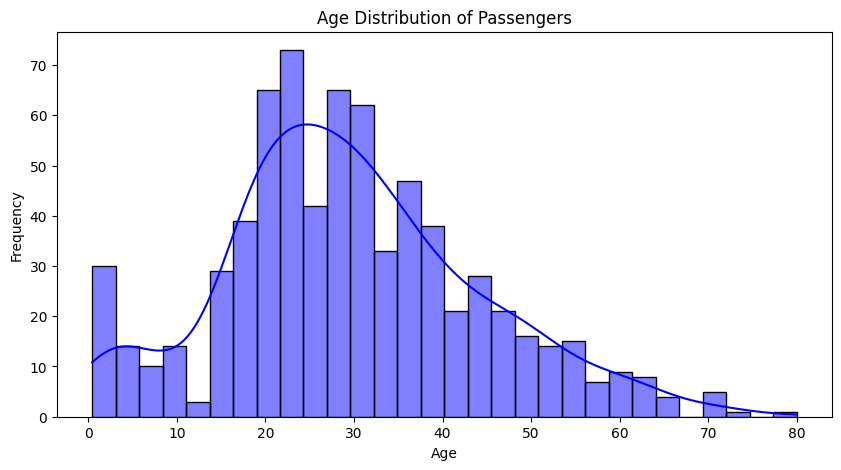

In [11]:
# Visualization 3: Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

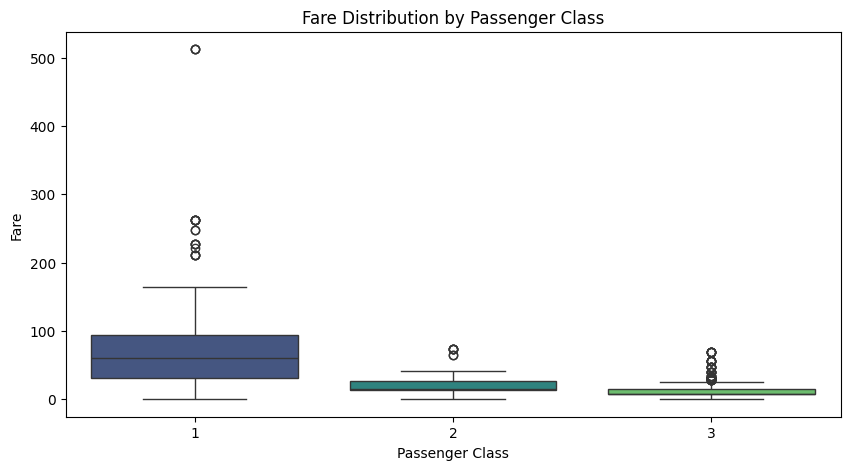

In [12]:
# Visualization 4: Fare Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

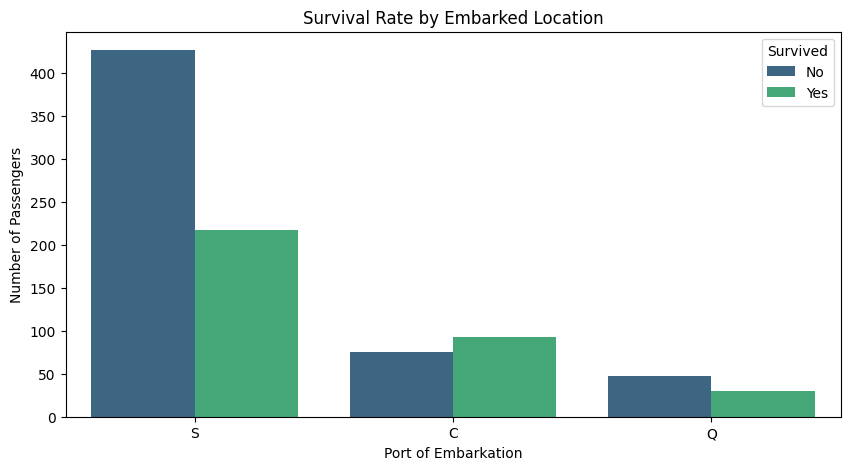

In [13]:
# Visualization 6: Survival Rate by Embarked Location
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

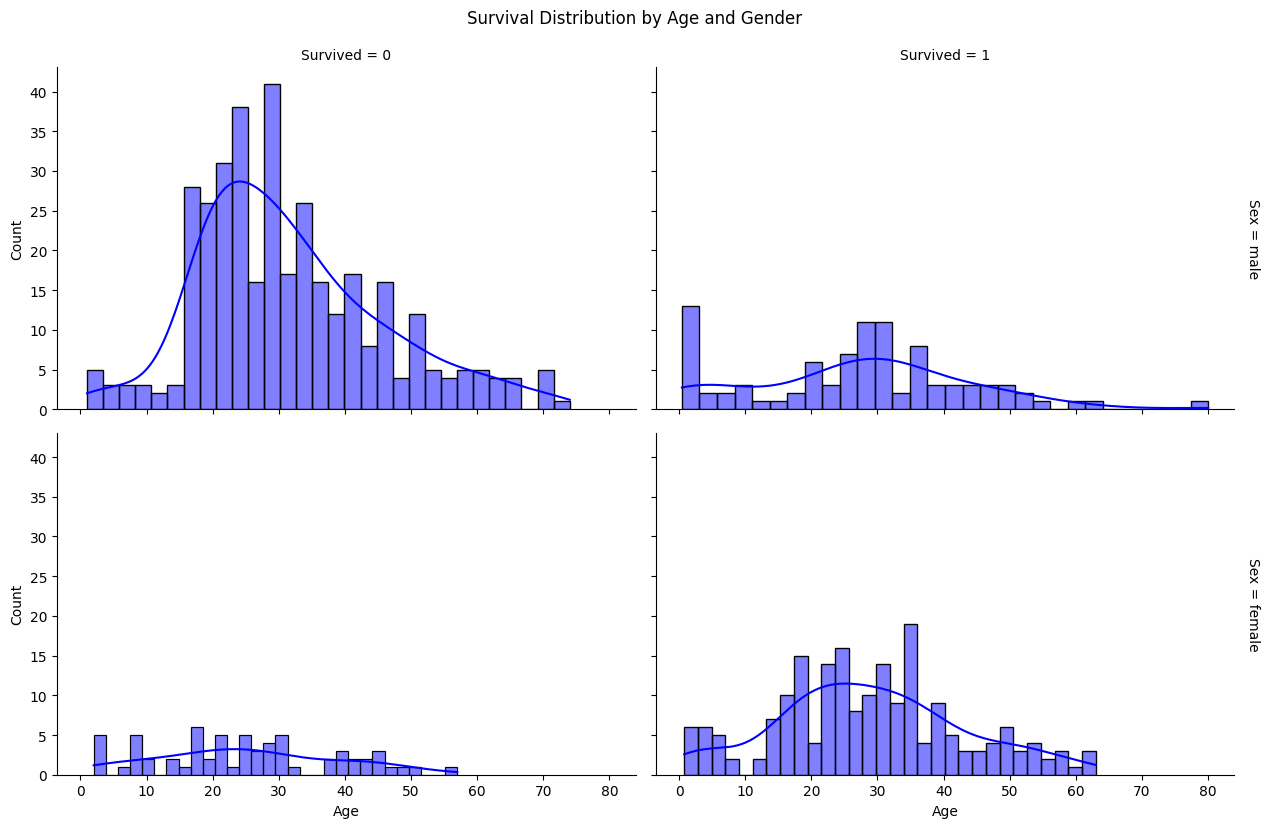

In [14]:
# Visualization 7: Survival by Age and Gender
g = sns.FacetGrid(df, col="Survived", row="Sex", margin_titles=True, height=4, aspect=1.6)
g.map(sns.histplot, "Age", bins=30, kde=True, color="blue")
g.fig.suptitle('Survival Distribution by Age and Gender', y=1.03)
plt.show()

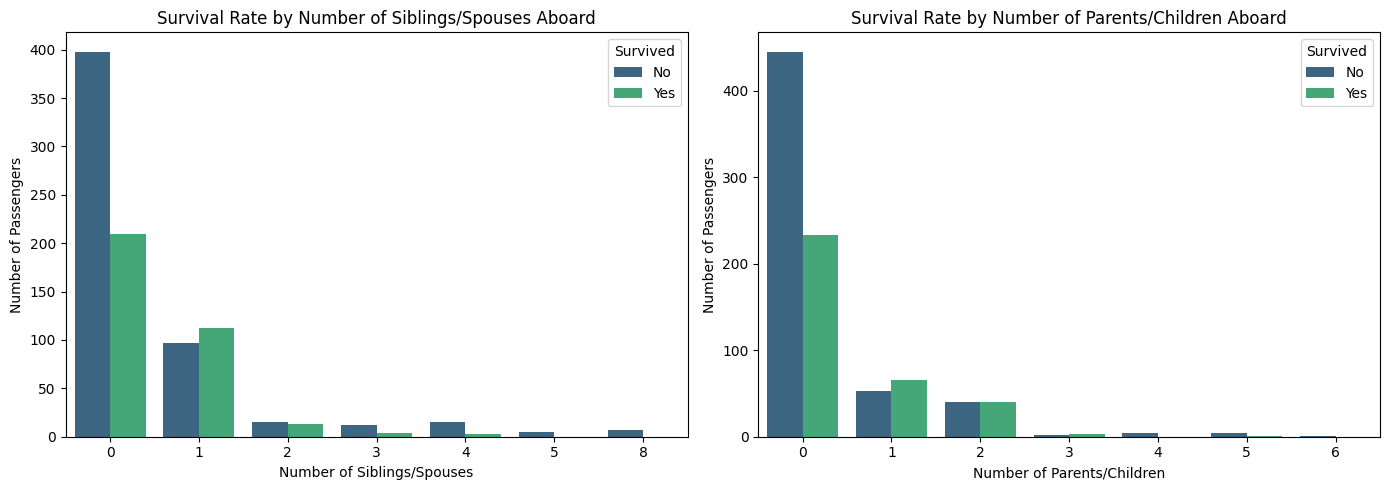

In [15]:
# Visualization 8: Distribution of Siblings/Spouses and Parents/Children Aboard
plt.figure(figsize=(14, 5))

# Siblings/Spouses
plt.subplot(1, 2, 1)
sns.countplot(x='SibSp', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Parents/Children
plt.subplot(1, 2, 2)
sns.countplot(x='Parch', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gen=le.fit_transform(x.Sex)

In [17]:
x["Gender"]=gen
x.drop("Sex",axis=1,inplace=True)

In [18]:
x

,Pclass,Age,Gender
0,3,22.000000,1
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,1
...,...,...,...
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1


In [19]:
x.isnull().sum()

Pclass    0
Age       0
Gender    0
dtype: int64

In [20]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [23]:
len(train_x)

712

In [24]:
len(test_x)

179

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

y_pred_lr=model.predict(test_x)

In [26]:
model.score(test_x,test_y)

0.8156424581005587

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
print("Accuracy Score: ",accuracy_score(test_y,y_pred_lr))
print("----------------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(test_y,y_pred_lr))
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(test_y,y_pred_lr))

Accuracy Score:  0.8156424581005587
----------------------------------------------------------
Confusion Matrix
[[95 12]
 [21 51]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.81      0.71      0.76        72

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [28]:
import numpy as np

# Reshape the input to be a 2D array
input_data = np.array([3, 20, 0]).reshape(1, -1)

if model.predict(input_data)[0] == 1:
    print("survived")
else:
    print("not survived")


survived


In [29]:
import pickle

with open('model2.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
    
# Load the model
with open('model2.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Check the model type
print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
